In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
DATASET = 'ita_teleco'
SEED = 42
N = 100
SEQ = 6

In [3]:
tf.random.set_seed(SEED)
np.random.seed(SEED)
plt.rcParams['figure.figsize'] = [10, 8]

In [4]:
def load_data(seq_len, n):
    csv = f'out/{DATASET}/data/ts_real_fake.csv'

    data = pd.read_csv(csv)

    real = data.real
    real = real.to_numpy()[:n * seq_len]
    real = np.reshape(real, (-1, seq_len))
    real = MinMaxScaler().fit_transform(real)

    fake = data.fake
    fake = fake.to_numpy()[:n * seq_len]
    fake = np.reshape(fake, (-1, seq_len))
    fake = MinMaxScaler().fit_transform(fake)

    return real, fake

In [5]:
def fig_path(fig_name): return f'out/{DATASET}/figures/KMEANS_{fig_name}'

In [6]:
real, fake = load_data(SEQ, N)
rand = np.random.rand(N, SEQ)

Estimated number of clusters: 2
Estimated number of noise points: 0


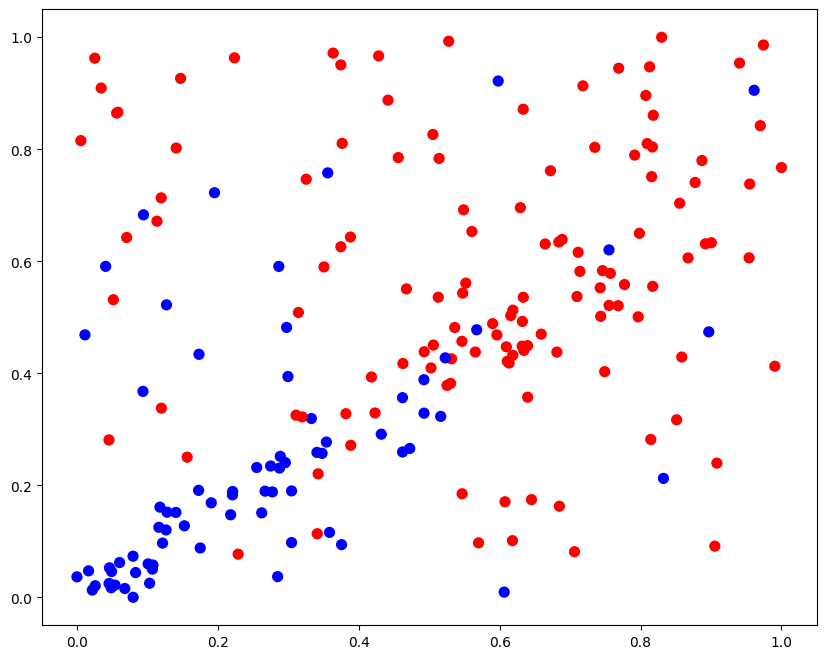

In [60]:
dataX = np.vstack((real, rand))
np.random.shuffle(dataX)

db = KMeans(n_clusters=2, random_state=SEED, n_init='auto').fit(dataX)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


colors = ['red' if label == 1 else 'blue' for label in labels]

plt.scatter(x = dataX[:,0], y=dataX[:,1], c=colors, s=50);
plt.savefig(fig_path('real_random'))

Estimated number of clusters: 2
Estimated number of noise points: 0


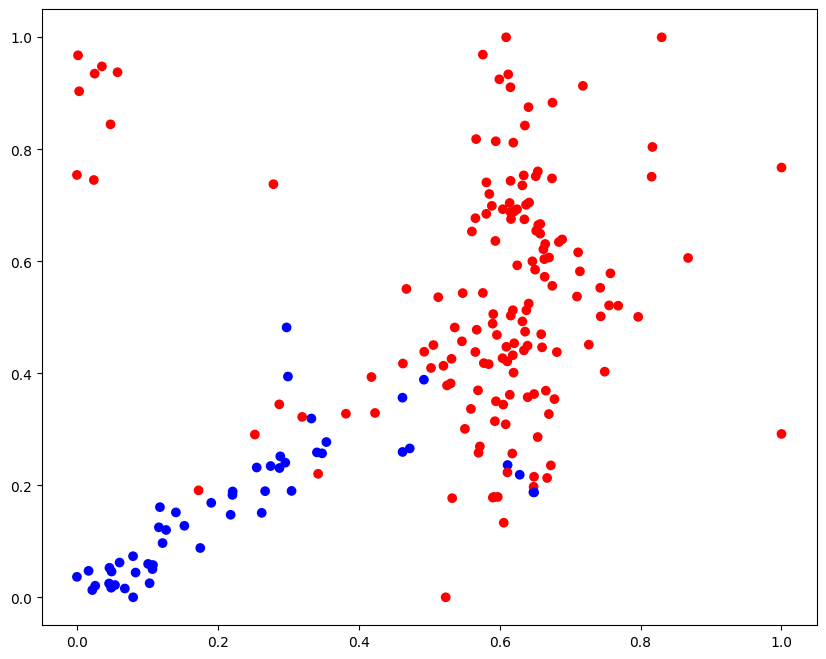

In [61]:
dataX = np.vstack((real, fake))
np.random.shuffle(dataX)

db = KMeans(n_clusters=2, random_state=SEED, n_init='auto').fit(dataX)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

colors = ['red' if label == 1 else 'blue' for label in labels]
plt.scatter(x = dataX[:,0], y=dataX[:,1], c=colors);
plt.savefig(fig_path('real_fake'))